# Assignment

## Task 2. Coral Image Classification

In [ ]:
"""
Adapted from Recognizing hand-written digits
    Gael Varoquaux
    Accessed 15/10/2022
""";

In [ ]:
# Connect to my Google Drive
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics, linear_model
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize
import numpy as np
import os # Optional
import glob # Optional

In [ ]:
train_files = datasets.load_files("drive/MyDrive/Code/comp3007/assignment/task2/svm/resources/train/", load_content=False)
test_files = datasets.load_files("drive/MyDrive/Code/comp3007/assignment/task2/svm/resources/test/", load_content=False)

In [ ]:
def read_images(filenames):
    n_samples = len(filenames)
    images = list()
    for filename in filenames:
        image = plt.imread(filename)
        image = resize(image, (224, 224, 1), preserve_range=True)
        images.append(image)
    return np.array(images).reshape((n_samples, -1))

In [ ]:
X_train = read_images(train_files.filenames)
y_train = train_files.target

X_test = read_images(test_files.filenames)
y_test = test_files.target

# Learn the images on the train subset
classifier = svm.SVC(gamma=0.001)
classifier.fit(X_train, y_train)

# Predict the class of the image on the test subset
predicted = classifier.predict(X_test)

In [ ]:
print(
    f"Classification report for classifier {classifier}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       200
           1       0.94      0.95      0.95       200

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400




Confusion matrix:
[[188  12]
 [  9 191]]


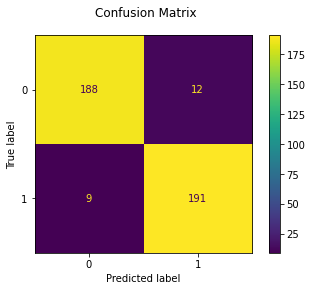

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()